In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# =============================================================================
# Directory Paths
# =============================================================================

RAW_DATA_PATH = "../data/raw"
PROCESSED_DATA_PATH = "../data/processed/"

Analyze perturbed data

In [3]:
processed_files = os.listdir(PROCESSED_DATA_PATH)

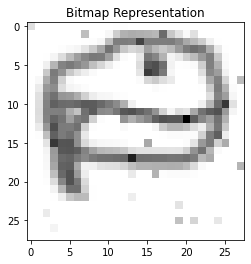

KeyboardInterrupt: 

In [33]:
import time
from IPython.display import clear_output

visualize_this_data = np.load(os.path.join(PROCESSED_DATA_PATH, processed_files[3]))
# Visualize
for i in range(len(visualize_this_data)):
    plt.imshow(visualize_this_data[i].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.title('Bitmap Representation')
    plt.show()
    time.sleep(0.2)  # Pause for half a second to ensure the plot is displayed
    clear_output(wait=True)  # Clear the output after displaying each image

In [4]:

# Extend data to include all bitmap files, for visualization
data = []
for processed_file in processed_files:
    images = np.load(os.path.join(PROCESSED_DATA_PATH, processed_file))
    data.extend(list(images))
data = np.array(data)

In [27]:
# Extend data to include all bitmap files, for visualization
raw_data = []
for processed_file in processed_files:
    images = np.load(os.path.join(RAW_DATA_PATH, processed_file))
    raw_data.extend(list(images))
raw_data = np.array(raw_data)

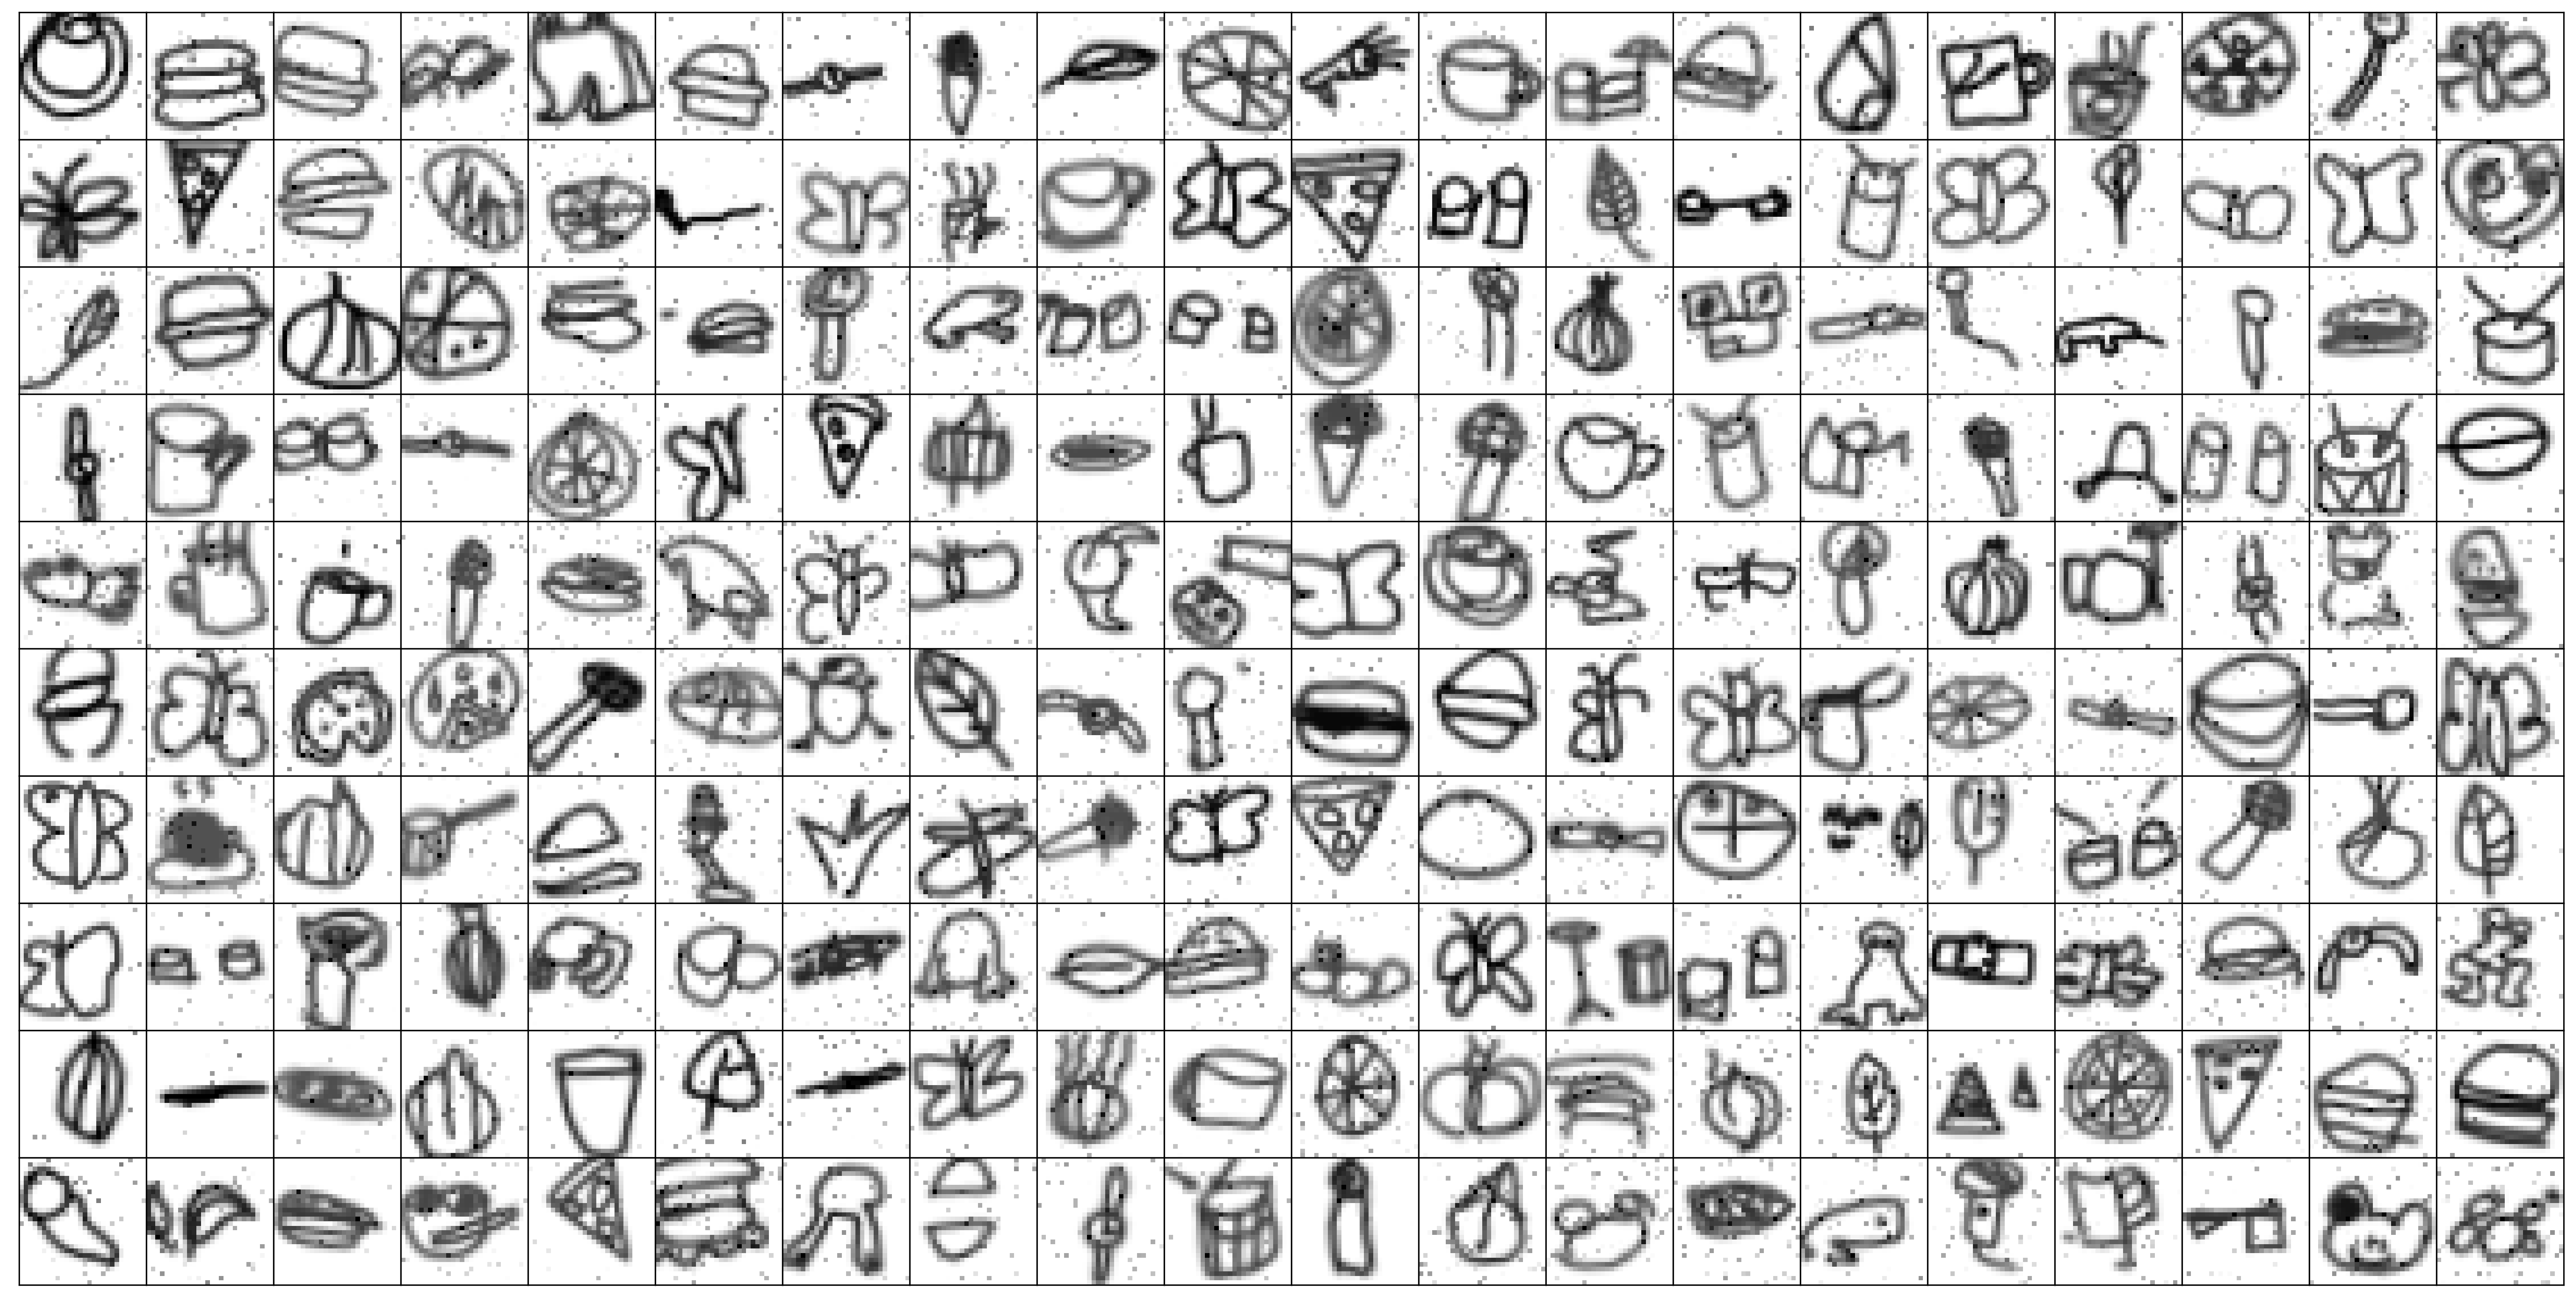

In [26]:
import matplotlib.pylab as pyl

dpi = 300  # Set a reasonable dpi for display
unit_size = 28 / dpi  # Calculate the unit size based on dpi and pixel dimensions
columns = 20
rows = 10
fig_width = columns  # Width has 7 units
fig_height = rows  # Height has 4 units

# Plot images side-by-side
fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)  # Adjust figsize to match aspect ratio

for i in range(1, columns * rows + 1):
    img = data[np.random.randint(0, len(data))].reshape(28, 28)  # Pick random image in data
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img, cmap='gray_r', interpolation='nearest', aspect='equal')  # Ensure each image is displayed as a square
    ax.set_xticks([])  # Removes numbered labels on x-axis
    ax.set_yticks([])  # Removes numbered labels on y-axis

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)  # Minimize space around and between subplots
plt.show()

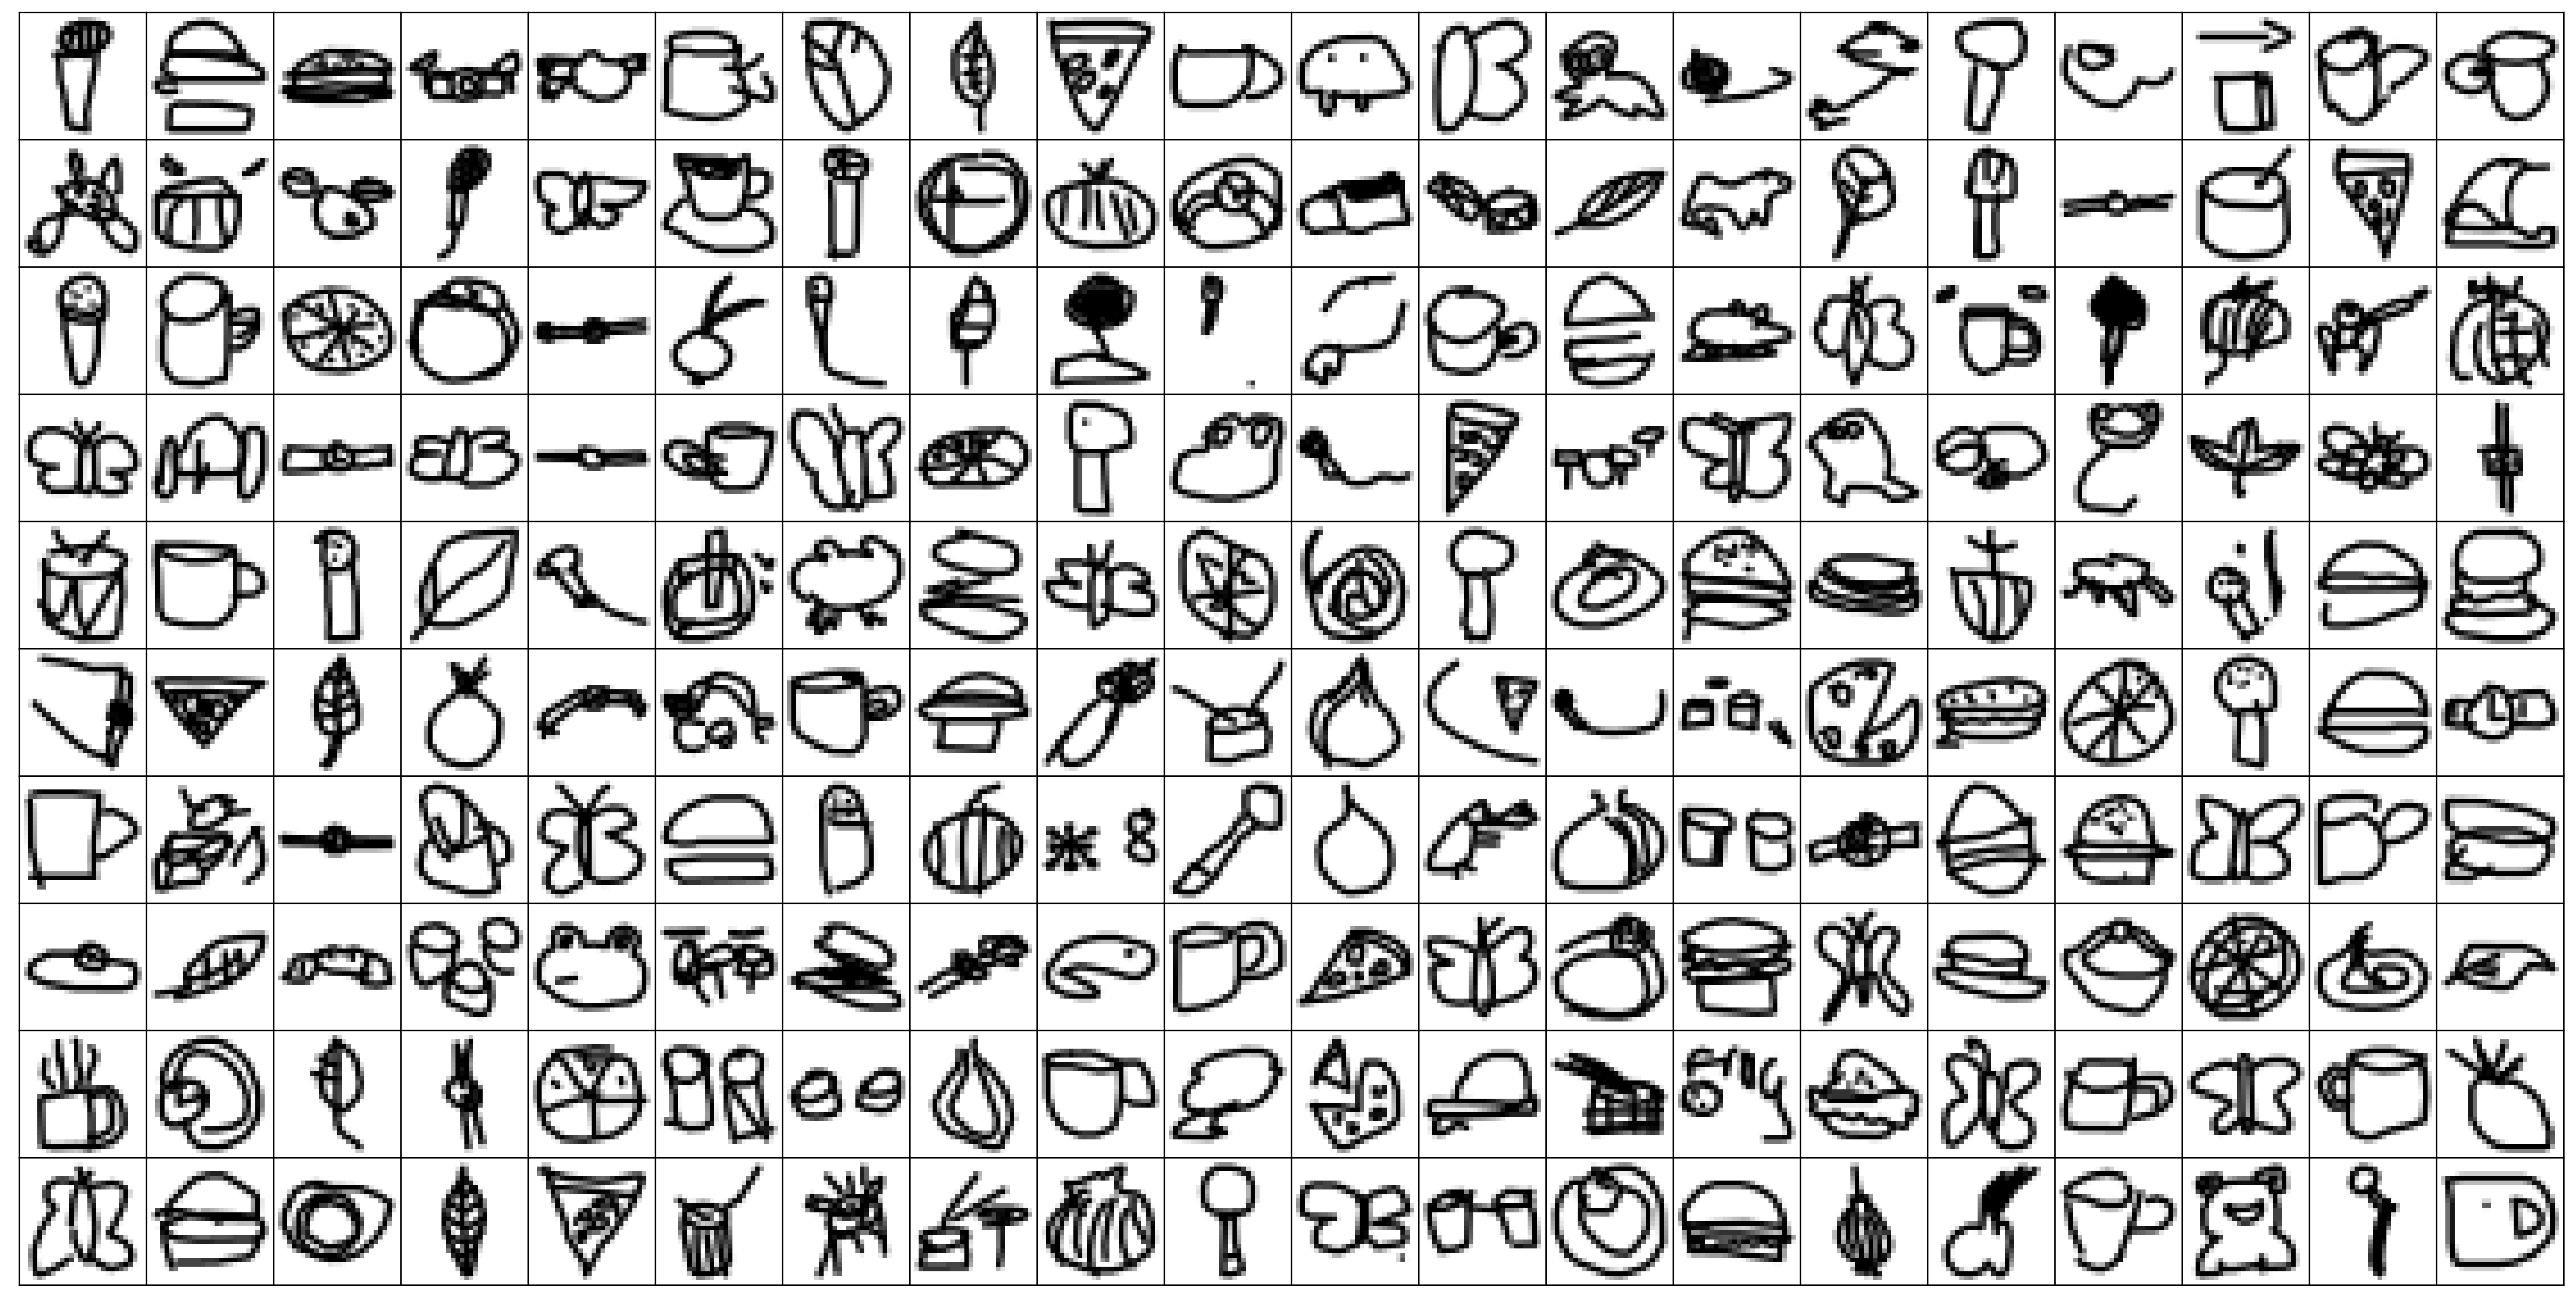

In [31]:
dpi = 300  # Set a reasonable dpi for display
unit_size = 28 / dpi  # Calculate the unit size based on dpi and pixel dimensions
columns = 20
rows = 10
fig_width = columns  # Width has 7 units
fig_height = rows  # Height has 4 units

# Plot images side-by-side
fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)  # Adjust figsize to match aspect ratio

for i in range(1, columns * rows + 1):
    img = raw_data[np.random.randint(0, len(raw_data))].reshape(28, 28)  # Pick random image in data
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img, cmap='gray_r', interpolation='nearest', aspect='equal')  # Ensure each image is displayed as a square
    ax.set_xticks([])  # Removes numbered labels on x-axis
    ax.set_yticks([])  # Removes numbered labels on y-axis

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)  # Minimize space around and between subplots
plt.show()

In [18]:
bm_data_length = []

for processed_file in processed_files:
    bm_data = np.load(os.path.join(PROCESSED_DATA_PATH, processed_file))
    bm_data_length.append((processed_file, len(bm_data)))

# Files are of different sizes
# TODO: Cut down all file size to min(bm_data_length)

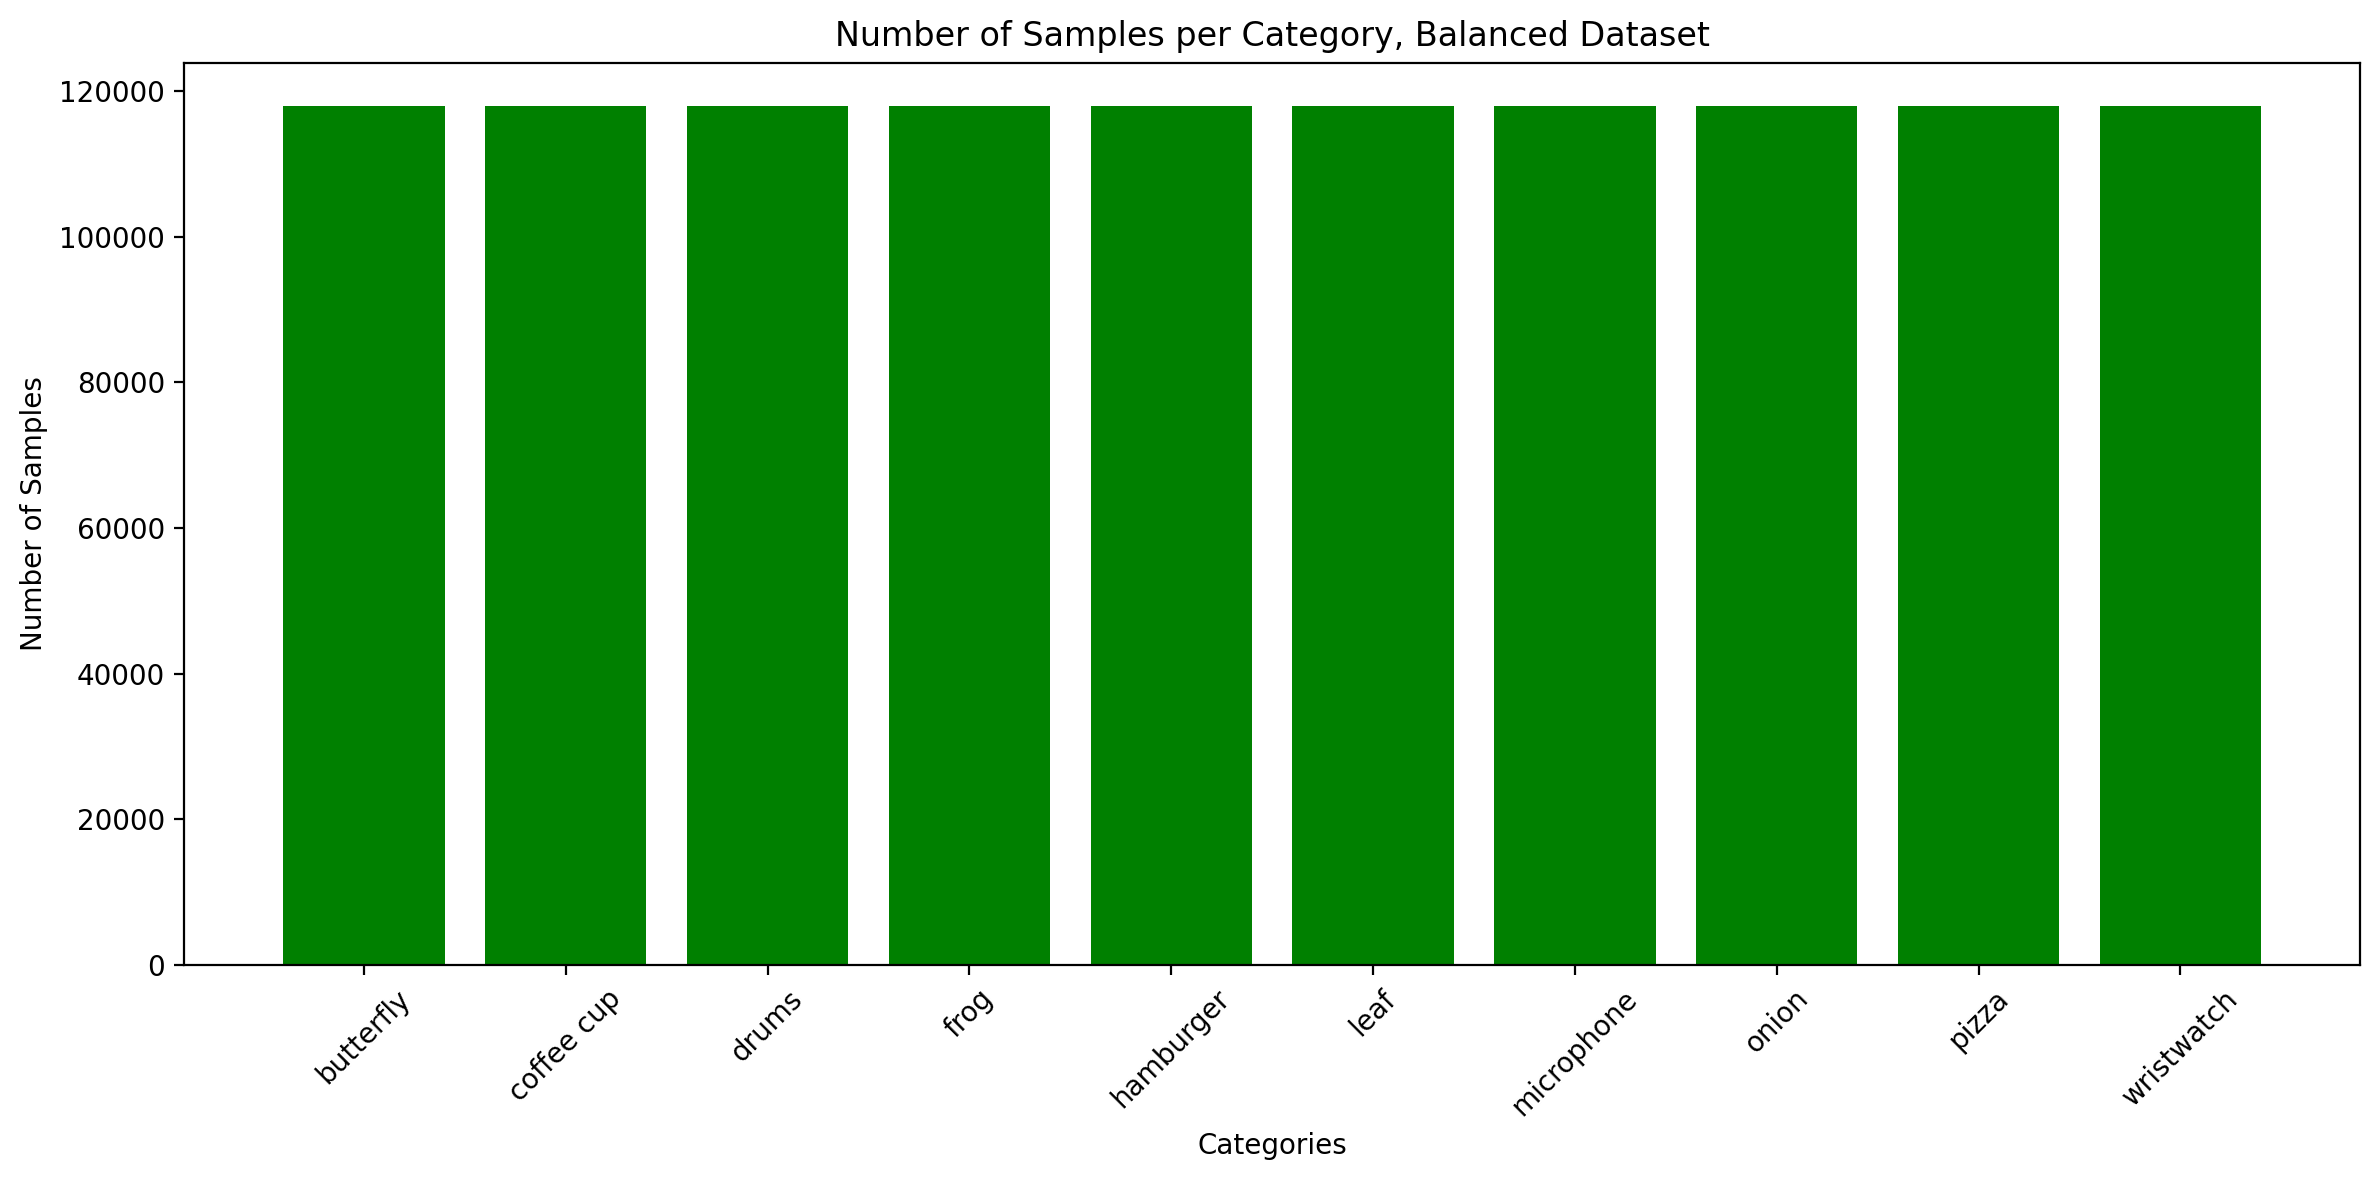

In [19]:
# Extracting filenames and sizes
categories = [name.split('.')[0] for name, _ in bm_data_length]  # Remove '.npy' for cleaner x-axis labels
sizes = [size for _, size in bm_data_length]

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(categories, sizes, color='green')  # Create a bar plot
plt.xlabel('Categories')  # Label on X-axis
plt.ylabel('Number of Samples')  # Label on Y-axis
plt.title('Number of Samples per Category, Balanced Dataset')  # Title of the plot
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

PCA

[0.06565866 0.12130872 0.16447717 0.20471243 0.24106279 0.27001118
 0.29632559 0.31778829 0.33722741 0.35539218 0.3720501  0.38779283
 0.4022993  0.41480186 0.42695048 0.43853007 0.44971312 0.46021288
 0.47038002 0.48016144 0.48944389 0.49832939 0.50687575 0.51527215
 0.5234186  0.53132067 0.53910919 0.54661406 0.55386854 0.56076383
 0.56745571 0.57410172 0.58059987 0.58696357 0.59320886 0.59935445
 0.60532448 0.61084675 0.61628542 0.62161799 0.62691625 0.63215017
 0.63720165 0.64222844 0.64719863 0.65198595 0.65667096 0.66120331
 0.66567364 0.67004042 0.67435842 0.67853526 0.68266824 0.68673252
 0.69077881 0.69476413 0.69868029 0.70238656 0.70601129 0.70959601
 0.71313618 0.71657011 0.71999867 0.72339141 0.72673254 0.72992542
 0.73304631 0.73614457 0.73922422 0.74225244 0.74521436 0.74816845
 0.75110777 0.75394864 0.75675503 0.75951366 0.76217218 0.76480183
 0.76739668 0.76994013 0.77244615 0.77492762 0.77732456 0.77969728
 0.78205535 0.78437825 0.78665344 0.78891823 0.79115808 0.7933

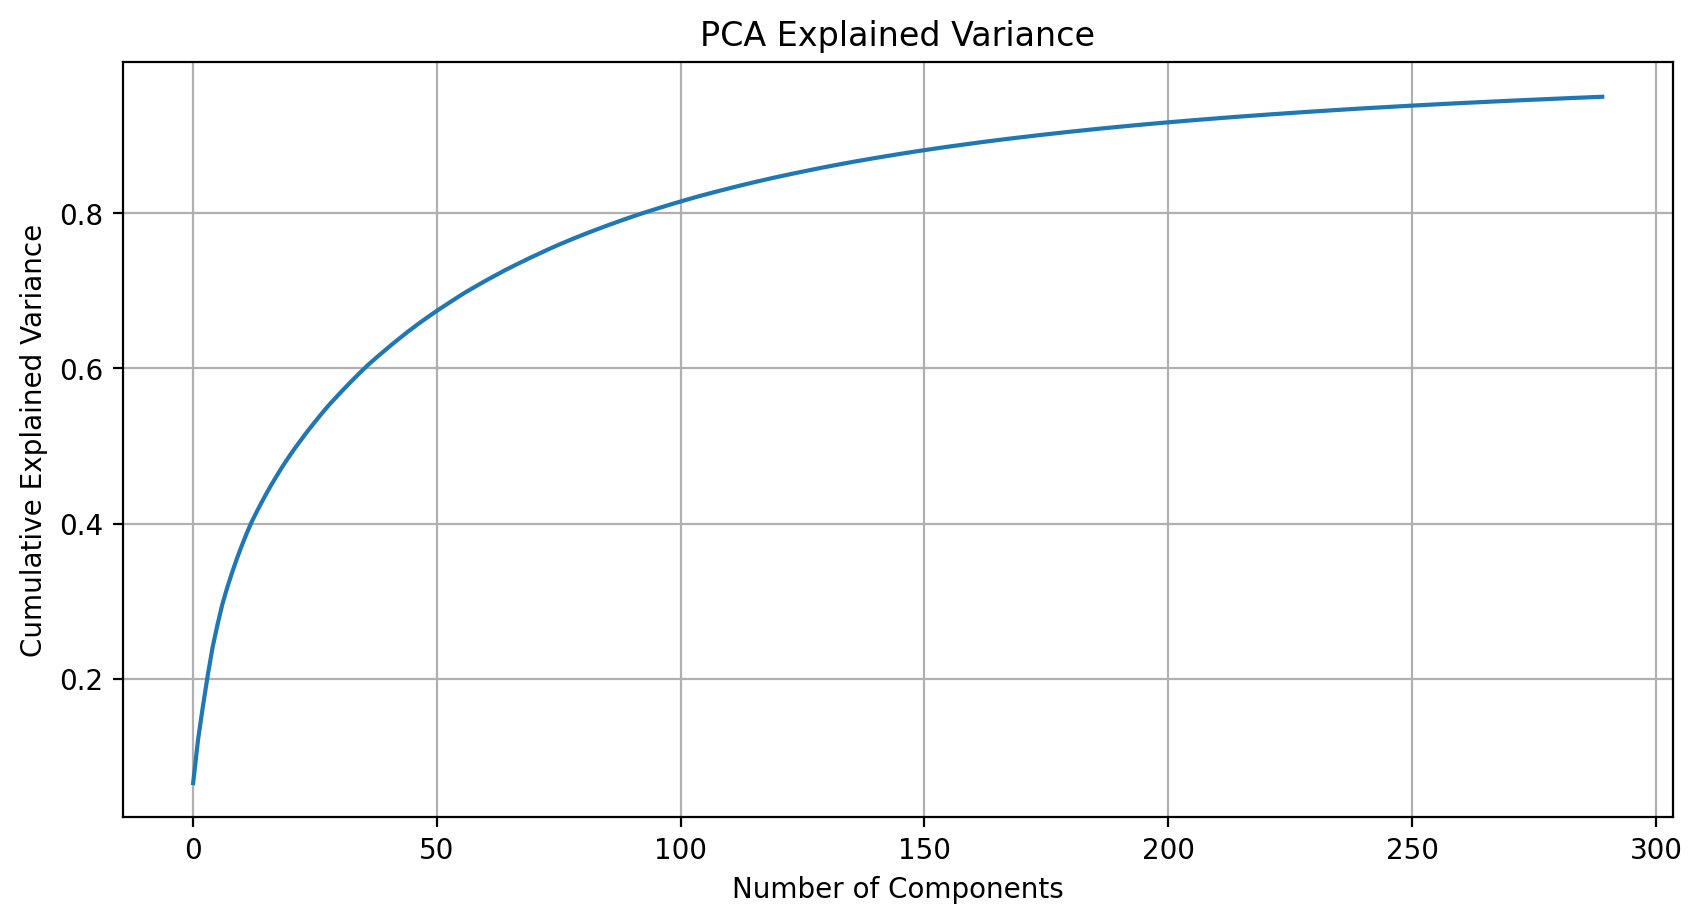

Number of components to explain 95% variance: 290


In [31]:
from sklearn.decomposition import PCA

def perform_pca(data):
    pca = PCA(0.95)
    principal_components = pca.fit_transform(data)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    print(explained_variance)
    
    plt.figure(figsize=(10, 5))
    plt.plot(explained_variance)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)
    plt.show()

    # Find the number of components for a desired explained variance, e.g., 95%
    n_components_95 = np.argmax(explained_variance >= 0.95) + 1  # +1 because index is zero-based
    print(f"Number of components to explain 95% variance: {n_components_95}")

    return pca, principal_components

# Assuming 'perturbed_data_matrix' is a [n_samples, 784] array from your dataset
# Let's say you want to initially try with enough components to explain 95% of the variance
perturbed_data_matrix = np.vstack([img.flatten() for img in data])  # Stacking all category images

# Perform PCA
pca, components = perform_pca(perturbed_data_matrix)  # You might adjust n_components based on the plot


In [38]:
import pandas as pd

labels = [category.replace('.npy', '') for category in processed_files]

df = pd.DataFrame()

for file, label in zip(processed_files, labels):
    # Load images
    images = np.load(os.path.join(PROCESSED_DATA_PATH, file))
    # Squeeze the images to remove the singleton dimension
    images = images.squeeze()
    temp_df = pd.DataFrame(images)
    temp_df['label'] = label
    df = df.append(temp_df, ignore_index=True)

# Assuming all images have the same flatten size
pixel_columns = [f'pixel{i}' for i in range(images.shape[1])]  
df.columns = pixel_columns + ['label']


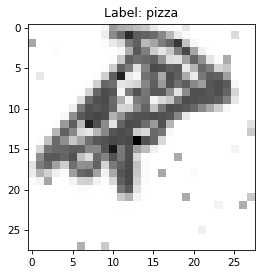

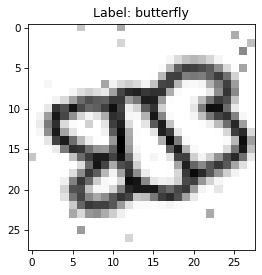

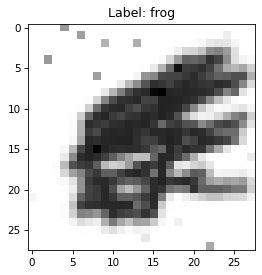

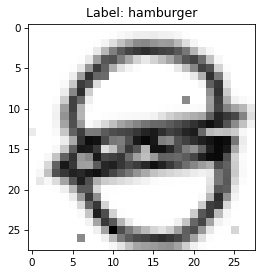

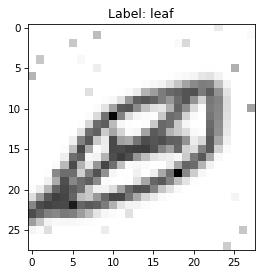

In [77]:
# Randomly sample a few images and their labels from the DataFrame
sampled_images = df.sample(n=5).reset_index(drop=True)
for _, row in sampled_images.iterrows():
    # print(repr(row[:-1].values.reshape(28, 28).astype(dtype='float32')))
    image, label = row[:-1].values.reshape(28, 28).astype(dtype='float32'), row['label']
    plt.imshow(image, cmap='gray_r')
    plt.title(f'Label: {label}')
    plt.show()

pyl.rcParams['figure.dpi'] = 75    # Adjust figure output size

In [82]:
df = df.sample(frac=1).reset_index(drop=True)

In [91]:
CSV_DATA_PATH = "../data/csv/"
df.to_csv(CSV_DATA_PATH + "doodle_dataframe.csv", index=False)